In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import glob

In [ ]:
# z góry zadajemy architekture sieci:
inputLength = 2
outputLength = 3
layers = 4
hiddenNeuronsLength = 32
eta = 0.9

(634, 635, 3)


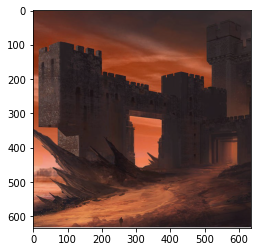

In [ ]:
#przygotowanie i normalizacja wejscia (obrazu)
T = (np.array(Image.open("foto4.jpg").convert('RGB'))/255.0) * 0.9 + 0.05
print(T.shape)
imgHeight = T.shape[0]
imgWidth = T.shape[1]
plt.imshow(T)

In [ ]:
#przygotowanie przykładów uczących
Examples = []
Examples.append(np.zeros(inputLength + 1))
Examples[0][0] = 1
for i in range(0, layers - 1):
  Examples.append(np.zeros(hiddenNeuronsLength + 1))
  Examples[i + 1][0] = 1

In [ ]:
#losowanie wag
Weights = []
Weights.append(np.random.rand(hiddenNeuronsLength, inputLength + 1))
for i in range(0, layers - 1):
  if i + 1 == layers - 1:
    Weights.append(np.random.randn(outputLength, hiddenNeuronsLength + 1))
  else:
    Weights.append(np.random.randn(hiddenNeuronsLength, hiddenNeuronsLength + 1))

In [ ]:
def drawLearning(Examples, x, y):
  Output = []

  for i in range(0, layers): #przechodzimy siec w przód zapamietując jej wejscie i wyjście
    Output.append(1/(1+np.exp(-np.sum(Weights[i] * Examples[i], axis = 1)))) #sigmoida
    if i + 1 < layers:
      Examples[i + 1][1:] = Output[i]
  delta = []
  func = (Output[layers - 1] - T[x,y])
  derivative = Output[layers - 1] * (1 - Output[layers - 1])
  layer_delta = func * derivative # delta z ostatniej warstwy ukrytej
  delta.append(layer_delta.copy())
  tempI = 0
  for i in range(layers - 2, -1, -1): #przechodzimy siec w tyl licząc delte z poprzednich warstw
    layer_delta = np.sum(delta[tempI] * np.transpose(Weights[i+1][:,1:]), axis=1) * Output[i] * (1 - Output[i])
    delta.append(layer_delta.copy())
    tempI += 1

  for (i, delt) in enumerate(reversed(delta)):
    Weights[i] = Weights[i] - (eta * np.reshape(delt, (delt.shape[0], 1)) * np.reshape(Examples[i], (1, Examples[i].shape[0])))

In [ ]:
def showResult(): #rysowanie obrazu
  Result = np.zeros(T.shape)
  for i in range(0, imgHeight):
    Examples[0][1] = (i/imgHeight - 0.5) * 2
    for j in range(0, imgWidth):
      Examples[0][2] = (j/imgWidth - 0.5) * 2
      for k in range(0, layers):
        Output = 1/(1+np.exp(-np.sum(Weights[k] * Examples[k], axis=1)))
        if k + 1 < layers:
          Examples[k + 1][1:] = Output
      Result[i][j] = Output
  return Result

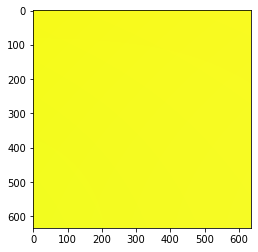

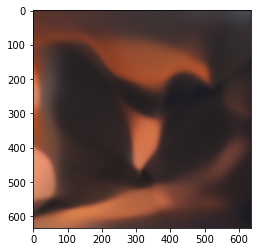

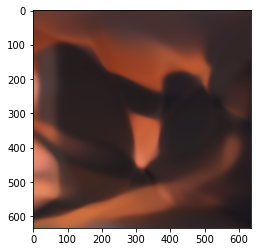

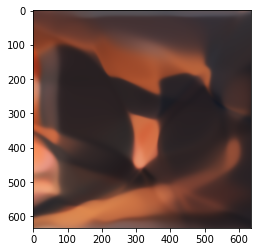

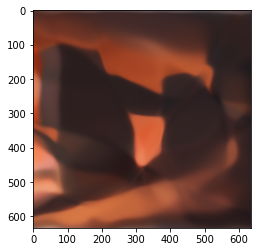

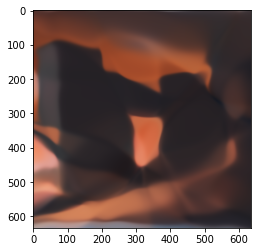

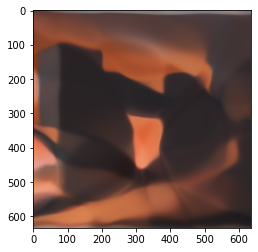

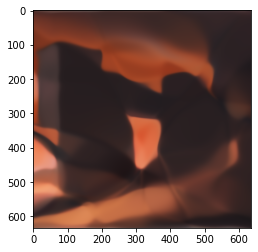

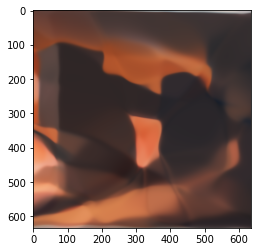

In [ ]:
for i in range(0, 9000000): #bierzemy losowy punkt na start
  x = np.random.randint(0, imgHeight) 
  y = np.random.randint(0, imgWidth)
  Examples[0][1] = (x / imgHeight - 0.5) * 2
  Examples[0][2] = (y / imgWidth - 0.5) * 2
  drawLearning(Examples, x, y)
  if i % 1000000 == 0:
    plt.imshow(showResult())
    plt.show()